## Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

## Load The Data

In [2]:
data = pd.read_csv("../data/CustomerChurn_dataset.csv")

## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# loop through the categorical columns and replace spaces with np.nan
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].replace(' ', np.nan)

In [6]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# convert TotalCharges to numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

In [8]:
# impute missing values in TotalCharges column
imputer = SimpleImputer(strategy='mean')
data["TotalCharges"] = imputer.fit_transform(data[["TotalCharges"]])

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# check all the uqniue values in each column
for col in data.columns:
    print(col, ":", len(data[col].unique()), "\n", data[col].unique(), "\n")

customerID : 7043 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender : 2 
 ['Female' 'Male'] 

SeniorCitizen : 2 
 [0 1] 

Partner : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['No' 'Yes'] 

tenure : 73 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService : 2 
 ['No' 'Yes'] 

MultipleLines : 3 
 ['No phone service' 'No' 'Yes'] 

InternetService : 3 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : 3 
 ['No' 'Yes' 'No internet service'] 

OnlineBackup : 3 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection : 3 
 ['No' 'Yes' 'No internet service'] 

TechSupport : 3 
 ['No' 'Yes' 'No internet service'] 

StreamingTV : 3 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies : 3 
 ['No' 'Yes' 'No internet service'] 

Contract : 3 
 ['Month-to-month' 'One year' 'Two 

Data cleaning

In [12]:
# customerID does not provide any information about customer churn
data.drop("customerID", axis=1, inplace=True)

In [13]:
# having no interner/phone service is same as no
# replace No internet service and No phone service with No
for col in data.columns:
    if "No internet service" in data[col].unique():
        data[col] = data[col].replace("No internet service", "No")
    elif "No phone service" in data[col].unique():
        data[col] = data[col].replace("No phone service", "No")

In [14]:
# check all the uqniue values in each column
for col in data.columns:
    print(col, ":", len(data[col].unique()), "\n", data[col].unique(), "\n")

gender : 2 
 ['Female' 'Male'] 

SeniorCitizen : 2 
 [0 1] 

Partner : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['No' 'Yes'] 

tenure : 73 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService : 2 
 ['No' 'Yes'] 

MultipleLines : 2 
 ['No' 'Yes'] 

InternetService : 3 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : 2 
 ['No' 'Yes'] 

OnlineBackup : 2 
 ['Yes' 'No'] 

DeviceProtection : 2 
 ['No' 'Yes'] 

TechSupport : 2 
 ['No' 'Yes'] 

StreamingTV : 2 
 ['No' 'Yes'] 

StreamingMovies : 2 
 ['No' 'Yes'] 

Contract : 3 
 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : 2 
 ['Yes' 'No'] 

PaymentMethod : 4 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges : 1585 
 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

TotalCharges : 6531 
 [  29.85

In [15]:
# list numerical and categorical columns
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_cols = [col for col in data.columns if col not in num_cols and col != "Churn"]

In [16]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [18]:
data["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

## Feature Importance and Selection

In [19]:
# encode categorical columns
data_encoded = pd.get_dummies(data, columns=cat_cols)

In [20]:
for col in data_encoded.columns:
    print(col)

tenure
MonthlyCharges
TotalCharges
Churn
gender_Female
gender_Male
SeniorCitizen_0
SeniorCitizen_1
Partner_No
Partner_Yes
Dependents_No
Dependents_Yes
PhoneService_No
PhoneService_Yes
MultipleLines_No
MultipleLines_Yes
InternetService_DSL
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_Yes
TechSupport_No
TechSupport_Yes
StreamingTV_No
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_Yes
Contract_Month-to-month
Contract_One year
Contract_Two year
PaperlessBilling_No
PaperlessBilling_Yes
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [21]:
y = data_encoded["Churn"]
X = data_encoded.drop("Churn", axis=1)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,True,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,False,True,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,True,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [23]:
# using RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# train the model
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

# check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

# check feature importance
print(rf.feature_importances_)

Accuracy 0.7934705464868701
[0.14302533 0.14922684 0.16501611 0.01801073 0.01791603 0.01218375
 0.01247227 0.0153988  0.01558738 0.01207325 0.01206143 0.00487925
 0.00483514 0.01205766 0.01256503 0.01008333 0.03410554 0.01325656
 0.0146526  0.01194608 0.01391326 0.01409202 0.01210494 0.01219437
 0.01103544 0.01440546 0.01146681 0.01077474 0.01174813 0.011099
 0.05560582 0.00987914 0.02509952 0.01480399 0.01563686 0.01157041
 0.01228827 0.02942443 0.01150428]


In [24]:
# create a dataframe of feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# sort the dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# calculate the importance percentage
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100

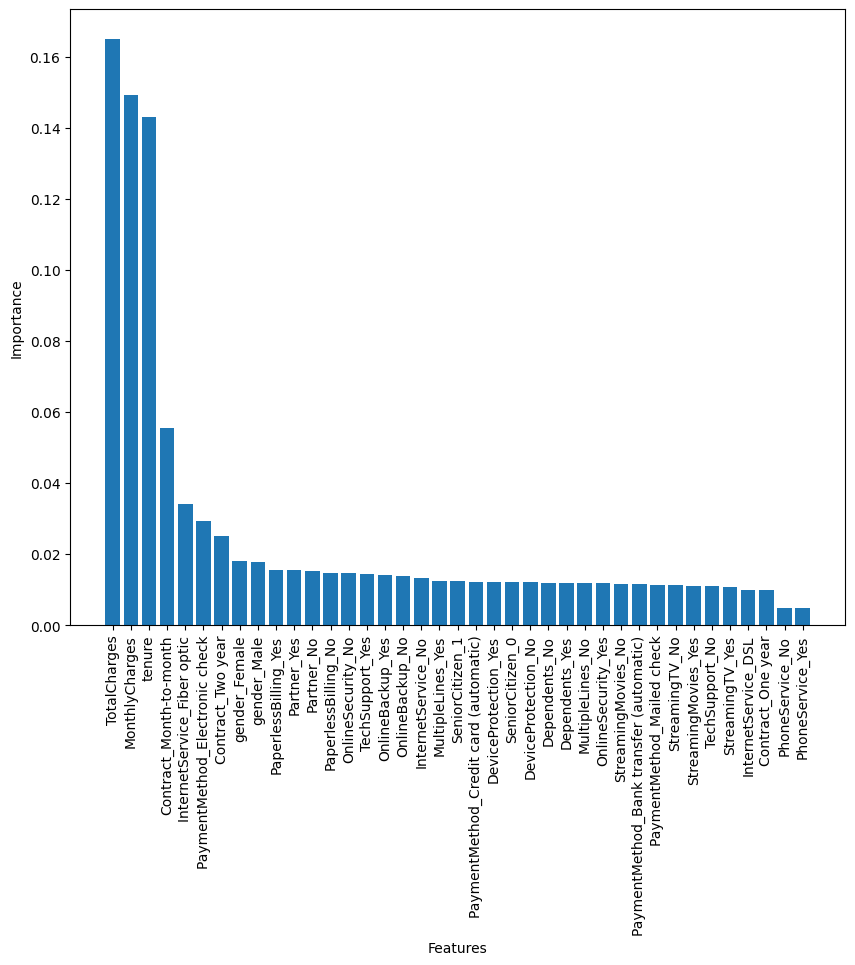

In [25]:
plt.figure(figsize=(10, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
# make the x-axis labels slanted
plt.xticks(rotation=90)
plt.show()

from the graph, the 1st 7 columns contribute the most to customer churn

In [26]:
print("Percentage contribution", feature_importance_df['Percentage'][:7].sum())
print()
print("Top 7 features:\n", "-"*15, sep="")
for col in feature_importance_df['Feature'][:7]:
    print(col)

Percentage contribution 60.15035892501258

Top 7 features:
---------------
TotalCharges
MonthlyCharges
tenure
Contract_Month-to-month
InternetService_Fiber optic
PaymentMethod_Electronic check
Contract_Two year


From the output above, we can see that TotalCharges, MonthlyCharges, tenure, Contract, InternetService and PaymentMethod are the top 6 features that contribute the most to the churn.

In [27]:
# calculating the percentage contribution of top 6 features
# including all its sub-segments

contribution = feature_importance_df[feature_importance_df["Feature"].str.contains("Contract|InternetService|PaymentMethod")]["Percentage"].sum() + feature_importance_df["Percentage"][:3].sum()

print("Percentage contribution", contribution)

Percentage contribution 67.00855750380394


In [28]:
feature_imp_cols = feature_importance_df[feature_importance_df["Feature"].str.contains("Contract|InternetService|PaymentMethod")]["Feature"].to_list() + feature_importance_df["Feature"][:3].to_list()
feature_imp_cols

['Contract_Month-to-month',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'Contract_Two year',
 'InternetService_No',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Mailed check',
 'InternetService_DSL',
 'Contract_One year',
 'TotalCharges',
 'MonthlyCharges',
 'tenure']

In [36]:
# define important columnsa
imp_cols = [
    "TotalCharges",
    "MonthlyCharges",
    "tenure",
    "Contract",
    "InternetService",
    "PaymentMethod",
]

### Selected Features
1. TotalCharges
2. MonthlyCharges
3. tenure
4. Contract
5. InternetService
6. PaymentMethod

## Exploratory Data Analysis

In [37]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Insights (Numerical Features)

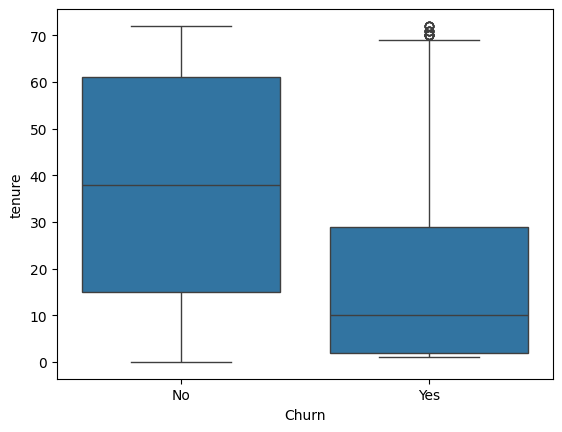

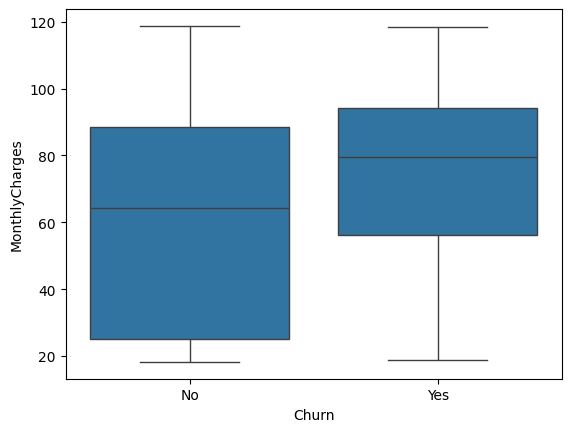

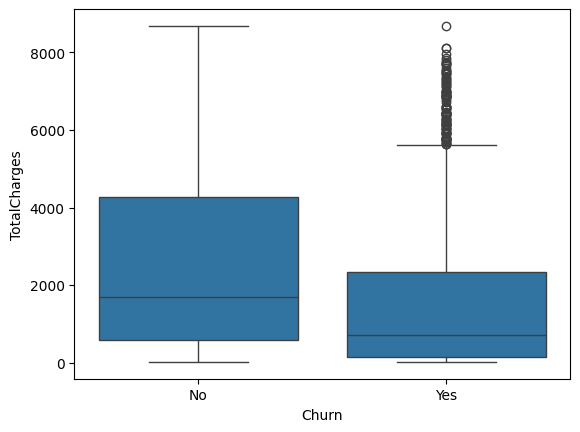

In [57]:
for col in num_cols:
    sns.boxplot(x="Churn", y=col, data=data)
    plt.show()

#### Notes
- 

### Insights (Categorical Features)

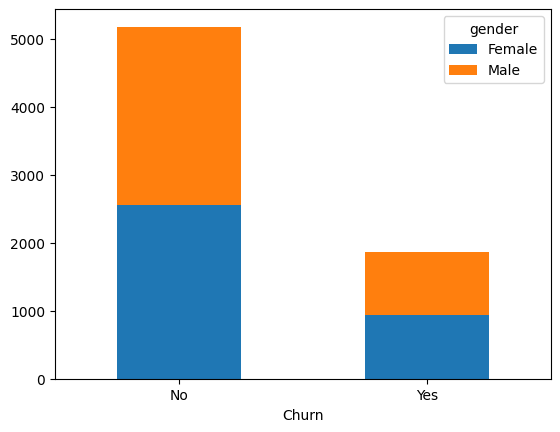

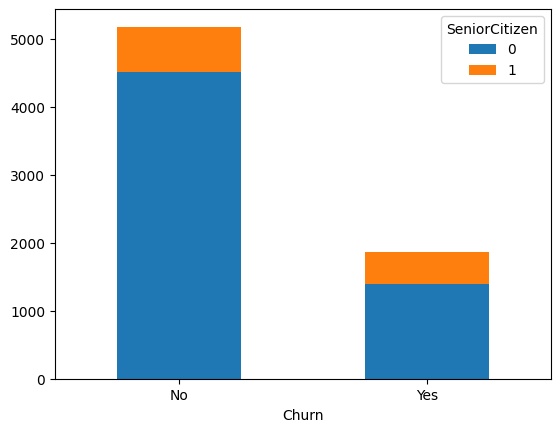

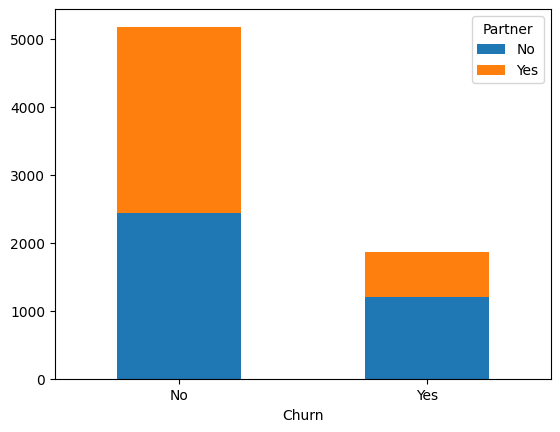

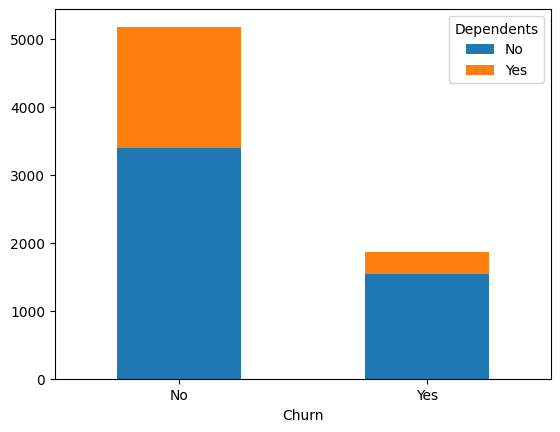

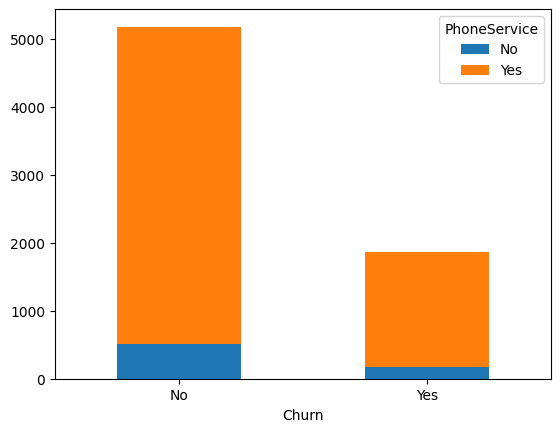

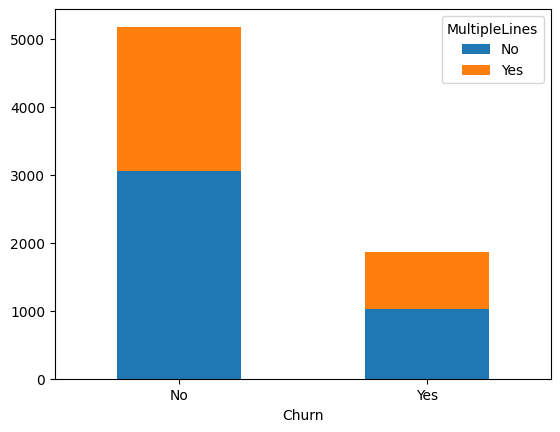

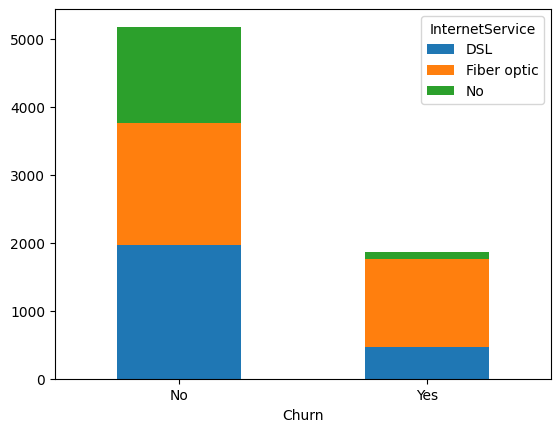

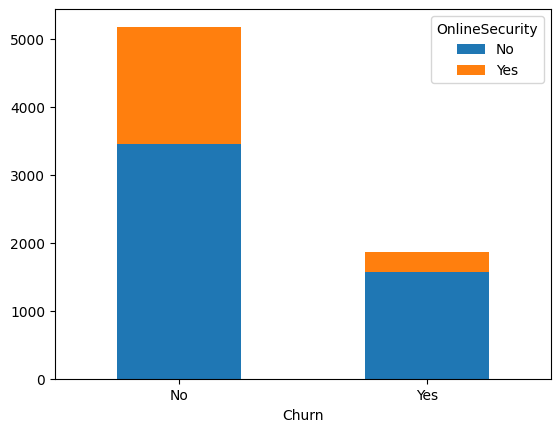

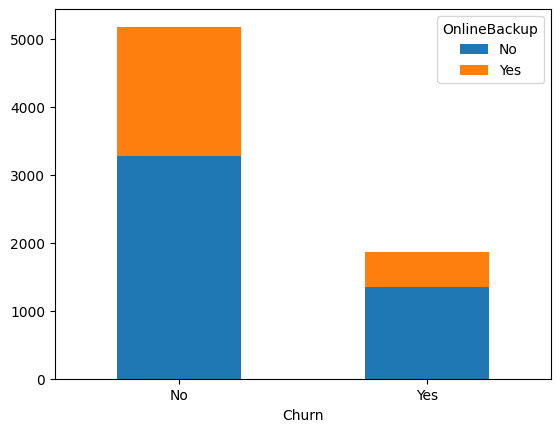

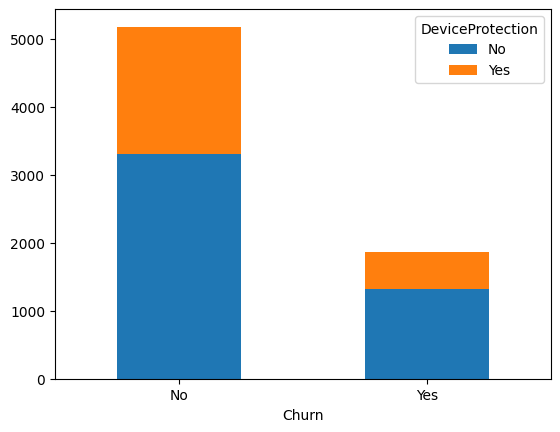

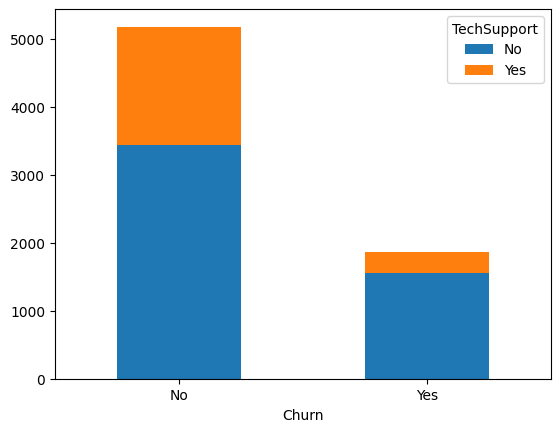

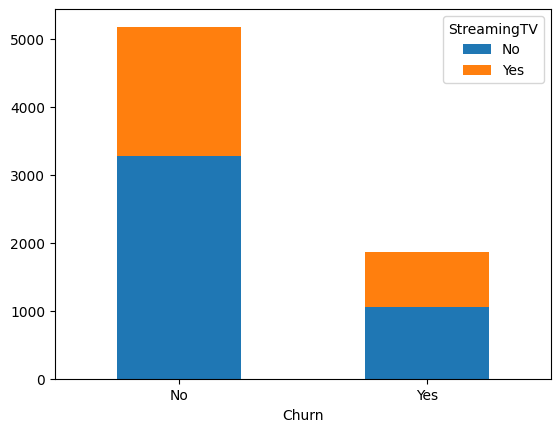

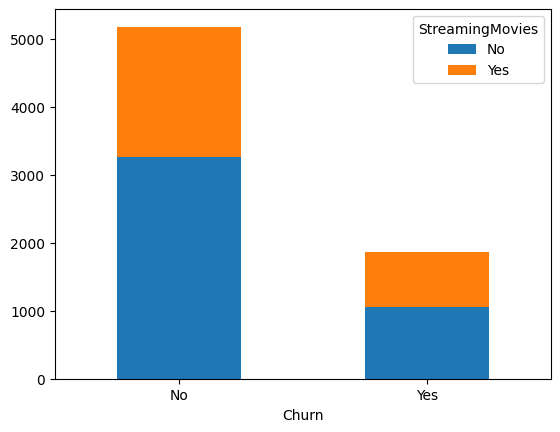

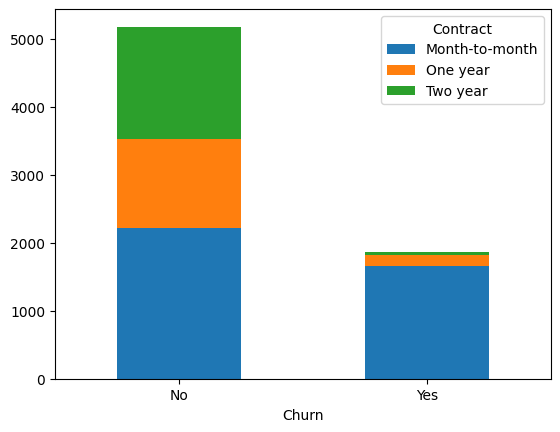

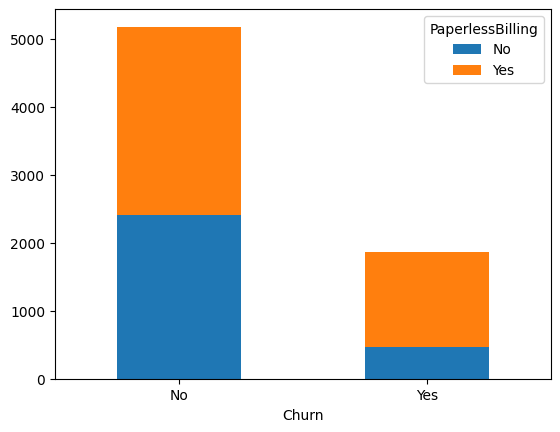

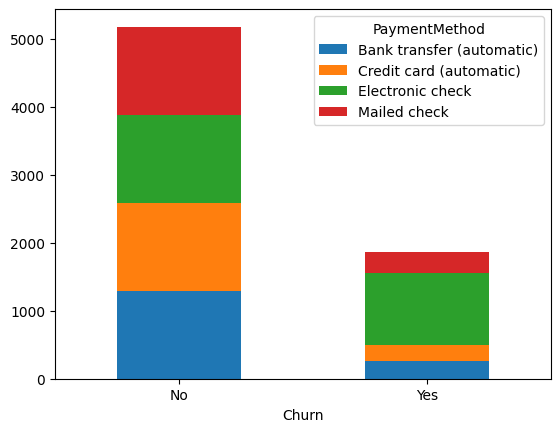

In [67]:
for col in cat_cols:
    pd.crosstab(data['Churn'], data[col]).plot(kind='bar', stacked=True)
    # make the x-axis labels stand vertically
    plt.xticks(rotation=0)
    plt.show()

#### Notes
- 